In [1]:
from geox_rand import rand

In [2]:
SQL = """
  select zd.* , sz.num_deliveries_r7d as deliveries 
  
  from (
  
    select 
  
       zda.date   
      ,zda.zone_id
    
      ,zda.priority_eta_available_visits / (zda.priority_eta_eligible_visits+0.0001)  as peta_available_pct
      ,zda.standard_eta_available_visits / (zda.standard_eta_eligible_visits+0.0001)  as seta_available_pct         

      ,zdo.delivery_late_count / (zdo.delivery_deliveries_count + 0.001)  as delivery_late_percent
      
      ,zdc.total_labor_cost_dollars / (zdc.deliveries + 0.001) as total_labor_cost_dollars

      ,zda.standard_eta_eligible_visits   as visits         
    
      ,count(*) over(partition by zda.zone_id) as n_days 
  
    from instadata.etl.zone_day_availability_metrics zda  
    left join instadata.etl.zone_day_on_time_metrics zdo 
      on zda.zone_id = zdo.zone_id 
     and zda.date = zdo.date   
    left join instadata.etl.zone_day_cost_metrics zdc
      on zda.zone_id = zdc.zone_id 
     and zda.date = zdc.date        
  
    where TRUE
      and zda.zone_id IN (937, 958, 740, 970, 1732, 725, 433, 236, 1787, 492, 1966, 168, 1023, 452, 1302, 1915, 657, 965, 384, 851, 1617, 370, 604, 812, 780, 1044, 328, 308, 1000, 393, 1018, 1660, 588, 321, 174, 1142, 982, 1045, 276, 488, 432, 1345, 1413, 1452, 1753, 1823, 1859, 169, 714, 1878, 1040, 1667, 296, 1185, 1630, 462, 831, 429, 643, 1450, 1363, 1333, 1533, 1414, 1498, 1508, 1510, 1516, 1974, 751, 768, 1053, 1628, 1634, 754, 1032, 761, 2027, 753, 765, 436, 693, 942, 1001, 769, 438, 615, 703, 757, 759, 1002, 439, 471, 1005, 1445, 1624, 746, 443, 1029, 1423, 1057, 752, 857, 1019, 1075, 1545, 1790, 1796, 750, 856, 1494, 1548, 1800, 838, 38, 473, 924, 960, 613, 1449, 1544, 1629, 1795, 1016, 616, 437, 611, 618, 709, 854, 1443, 1551, 1798, 774, 1984, 825, 1967, 639, 446, 749, 1028, 1066, 760, 772, 1072, 1921, 1500, 1298, 1139, 1673, 1576, 290, 1714, 770, 949, 755, 1549, 767, 1788, 1344, 1323, 844, 459, 1972, 1550, 1794, 1808, 1680, 731, 727, 1150, 1108, 1721, 677, 260, 267, 1765, 542, 669, 1415, 336, 503, 479, 1515, 1632, 440, 756, 771, 923, 850, 373, 282, 288, 1223, 1537, 172, 1012, 808, 1391, 1046, 619, 1098, 1113, 802, 620, 603, 534, 554, 424, 1402, 453, 1330, 392, 1390, 663, 1625, 1792, 695, 766, 1448, 1799, 697, 870, 319, 864, 214, 405, 400, 442, 692, 1552, 1627, 283, 1879, 1160, 1382, 1456, 815, 1085, 1039, 1407, 520, 280, 1024, 950, 1446, 939, 1451, 1060, 470, 1671, 464, 1374, 728, 248, 1328, 396, 738, 1294, 617, 707, 1635, 1781, 510, 1048, 1013, 505, 385, 455, 342, 376, 397, 410, 1447, 972, 1522, 764, 1288, 1388, 1757, 403, 441, 50, 1090, 1172, 326, 1547, 1174, 428, 454, 694, 779, 1366, 293, 773, 1486, 1267, 739, 93, 1360, 28, 369, 377, 507, 969, 1444, 1789, 196, 304, 379, 1228, 776, 1793, 912, 928, 204, 1357, 1419, 1683, 845, 239, 333, 354, 355, 421, 463, 572, 581, 644, 647, 649, 16, 372, 378, 1215, 735, 568, 450, 1517, 661, 1296, 305, 1587, 275, 1130, 1856, 558, 1601, 18, 380, 555, 1638, 1273, 737, 1520, 94, 104, 205, 207, 270, 383, 82, 1338, 1119, 242, 594, 798, 413, 27, 228, 434, 212, 1636, 1208, 1646, 920, 1131, 832, 1351, 1282, 285, 583, 1, 1316, 587, 1219, 705, 1469, 475, 1262, 1713, 646, 1647, 578, 1216, 1222, 641, 277, 626, 418, 814, 225, 830, 822, 1730, 1107, 1871, 1826, 95, 718, 1292, 1381, 1584, 1071, 58, 457, 179, 269, 160, 1231, 1455, 357, 548, 508, 1866, 1161, 1300, 514, 1192, 161, 162, 602, 170, 1289, 1050, 1088, 789, 1313, 101, 1321, 518, 504, 521, 786, 166, 1519, 1538, 736, 327, 468, 1375, 1276, 1280, 13, 925, 200, 1583, 987, 522, 1421, 1643, 533, 993, 1348, 541, 621, 1433, 523, 524, 1482, 1580, 238, 145, 860, 1466, 1368, 1110, 1065, 1299, 33, 575, 1477, 980, 1341, 645, 652, 116, 952, 1003, 1303, 1380, 79, 183, 1211, 726, 32, 981, 1505, 367, 85, 213, 292, 307, 335, 366, 374, 390, 391, 402, 476, 517, 549, 811, 720, 559, 679, 87, 586, 1166, 155, 1320, 675, 1149, 37, 186, 513, 544, 557, 560, 926, 427, 49, 365, 484, 562, 659, 674, 684, 1395, 710, 1083, 1854, 1101, 1435, 251, 241, 1438, 76, 185, 211, 218, 227, 245, 309, 371, 472, 490, 516, 747, 1623, 1339, 1121, 422, 495, 1093, 809, 1924, 347, 1509, 681, 543, 839, 973, 553, 1008, 81, 206, 368, 417, 431, 561, 599, 601, 653, 676, 678, 1976, 866, 1554, 430, 723, 1056, 84, 134, 173, 215, 253, 297, 302, 489, 530, 535, 538, 662, 708, 807, 819, 1346, 596, 654, 1290, 90, 493, 979, 389, 595, 1406, 625, 1762, 1277, 1059, 130, 201, 221, 229, 250, 359, 362, 394, 395, 477, 540, 651, 803, 804, 1412, 1425, 1379, 744, 988, 1082, 1217, 387, 235, 159, 176, 191, 337, 358, 423, 425, 426, 502, 629, 1355, 632, 682, 700, 788, 797, 743, 1210, 989, 590, 1158, 1283, 650, 1434, 187, 194, 310, 323, 721, 790, 1428, 1489, 741, 1639, 1837, 449, 1440, 1464, 1457, 1499, 500, 748, 1204, 1882, 1378, 1115, 592, 266, 332, 341, 375, 73, 274, 1709, 456, 480, 382, 1269, 1461, 820, 742, 1474, 353, 704, 1189, 1220, 687, 724, 1481, 783, 154, 190, 713, 2025, 1214, 237, 482, 598, 1480, 320, 823, 827, 1332, 940, 262, 1755, 177, 1535, 1681, 792, 571, 181, 78, 842, 1410, 1147, 1372, 983, 1331, 1068, 829, 356, 1490, 1146, 14, 1349, 223, 1343, 1376, 499, 219, 512, 447, 585, 930, 841, 953, 810, 818, 230, 325, 339, 1010, 640, 1007, 1148, 1546, 1665, 1805, 935, 691, 785, 921, 1485, 1919, 1342, 324, 1135, 1291, 1880, 781, 1491, 244, 1780, 1771, 295, 858, 922, 1507, 813, 272, 1064, 1087, 1097, 1120, 1207, 929, 1501, 1356, 1691, 146, 1759, 481, 1058, 1851, 1441, 532, 2046, 226, 144, 1842, 1086, 1206, 1908, 1015, 360, 867, 1070, 1089, 1694, 1749, 1806, 1855, 298, 1472, 331, 497, 1715, 531, 1416, 1270, 589, 974, 1532, 539, 817, 1439, 1322, 1719, 1336, 188, 506, 1177, 1801, 1310, 1640, 869, 918, 933, 1031, 1367, 1137, 1750, 167, 1034, 1287, 962, 1035, 1260, 151, 1037, 1055, 1074, 1099, 1129, 1213, 1589, 1894, 1920, 1922, 1962, 1212, 1340, 1506, 415, 730, 913, 914, 348, 1534, 863, 1564, 865, 1033, 1523, 1411, 261, 1377, 564, 1484, 563, 986, 1187, 1559, 1263, 1539, 919, 932, 954, 821, 569, 787, 340, 485, 722, 246, 826, 404, 1122, 916, 1492, 605, 1136, 451, 642, 591, 1084, 1286, 1091, 460, 796, 1818, 956, 1038, 1144, 1295, 420, 624, 758, 846, 1175, 1318, 1514, 1655, 941, 131, 852, 364, 273, 655, 1560, 957, 959, 1022, 1103, 1116, 1117, 1734, 1261, 696, 1275, 1614, 1364, 859, 593, 1914, 1497, 465, 609, 1654, 628, 195, 840, 977, 289, 943, 1133, 1118, 1127, 1006, 873, 806, 1567, 466, 961, 1009, 1092, 1106, 868, 853, 1100, 1317, 1426, 1720, 175, 1051, 1014, 1049, 1531, 1958, 528, 1124, 996, 416, 1157, 1278, 1293, 1319, 1400, 1418, 1420, 1431, 875, 1758, 552, 855, 1076, 1518, 1540, 946, 224, 511, 917, 1849, 1063, 1011, 1651, 936, 971, 995, 1467, 1470, 622, 478, 668, 259, 1731, 1265, 608, 1132, 927, 836, 627, 1397, 1864, 1561, 1021, 1043, 1069, 1079, 1094, 1134, 1143, 1145, 1153, 1259, 1271, 1387, 1417, 1427, 945, 1488, 1496, 1512, 1266, 1674, 1968, 931, 1850, 294, 243, 1126, 597, 994, 184, 1653, 1104, 351, 1453, 799, 1030, 1025, 1073, 1078, 1138, 1179, 1186, 1301, 1311, 1326, 1569, 1585, 1733, 1960, 1969, 1970, 1740, 1865, 361, 638, 322, 1077, 486, 1036, 1080, 1123, 1741, 828, 474, 964, 1312, 1181, 1052, 1362, 1285, 537, 1081, 1096, 1152, 1176, 1193, 1307, 1352, 1437, 1468, 1524, 1736, 1861, 2026, 1218, 600, 419, 1369, 1178, 658, 103, 363, 43, 582, 1830, 268, 1305, 1350, 1354, 1784, 1385, 1386, 1393, 1436, 963, 607, 1582, 1695, 1711, 1067, 1151, 334, 469, 182, 967, 1156, 1672, 1685, 683, 985, 279, 816, 127, 843, 445, 1281, 1264, 1870, 171, 1398, 1327, 1502, 1511, 1604, 1772, 1726, 1867, 1957, 1977, 975, 861, 278, 529, 519, 1454, 515, 1821, 178, 1334, 1353, 1365, 1558, 1688, 1689, 1848, 2010, 2022, 2032, 1937, 874, 1361, 702, 1786, 567, 656, 1504, 1483, 381, 1763, 1337, 1399, 1432, 1459, 1503, 1590, 1652, 1661, 1698, 1752, 1309, 1980, 551, 536, 2207, 2246, 2258, 2259, 701, 143, 152, 216, 386, 388, 458, 483, 491, 494, 550, 566, 574, 579, 623, 648, 680, 685, 686, 698, 711, 782, 837, 847, 871, 872, 951, 978, 990, 992, 997, 1017, 1041, 1054, 1061, 1140, 1167, 1182, 1229, 1230, 1249, 1257, 1258, 1272, 1371, 1373, 1383, 1430, 1458, 1613, 1619, 1809, 1916, 2121, 2124)
      and zda.zone_id NOT IN (79, 81, 84, 85, 94, 134, 162, 166, 187, 194, 204, 219, 221, 228, 238, 243, 245, 260, 269, 276, 278, 288, 290, 302, 309, 328, 332, 342, 347, 351, 362, 368, 375, 381, 382, 385, 392, 393, 395, 396, 402, 403, 404, 416, 430, 438, 449, 450, 465, 474, 489, 491, 493, 495, 513, 529, 541, 543, 549, 552, 554, 562, 568, 578, 579, 585, 587, 588, 597, 599, 603, 615, 619, 621, 623, 624, 625, 632, 642, 646, 648, 652, 654, 655, 657, 678, 684, 694, 703, 705, 718, 723, 728, 737, 738, 741, 750, 768, 799, 813, 815, 821, 823, 831, 839, 847, 859, 860, 863, 864, 875, 925, 933, 939, 956, 980, 983, 1001, 1011, 1018, 1023, 1031, 1032, 1037, 1038, 1040, 1063, 1077, 1082, 1084, 1089, 1091, 1093, 1097, 1100, 1101, 1124, 1134, 1146, 1156, 1158, 1161, 1187, 1204, 1213, 1215, 1258, 1259, 1260, 1266, 1270, 1271, 1272, 1276, 1285, 1290, 1298, 1299, 1301, 1311, 1312, 1316, 1321, 1336, 1353, 1354, 1357, 1371, 1373, 1379, 1380, 1391, 1402, 1411, 1415, 1419, 1420, 1426, 1430, 1440, 1443, 1444, 1447, 1452, 1470, 1480, 1485, 1486, 1490, 1497, 1503, 1504, 1512, 1522, 1532, 1537, 1538, 1540, 1546, 1554, 1558, 1567, 1628, 1629, 1630, 1634, 1646, 1651, 1667, 1671, 1691, 1719, 1720, 1730, 1741, 1752, 1755, 1786, 1793, 1795, 1796, 1818, 1866, 1882, 1908, 1919, 1937, 1976, 2032, 2121)
      and zda.date between 
          (select max(date) from instadata.etl.zone_day_availability_metrics 
                  where date < convert_timezone('America/Los_Angeles', current_date)::date) - 27 and 
          (select max(date) from instadata.etl.zone_day_availability_metrics
                  where date < convert_timezone('America/Los_Angeles', current_date)::date) 
  
   ) zd 
   
   inner join instadata.analysts.fact_zone_maturity_size_daily sz 
      on zd.zone_id = sz.zone_id
     and sz.delivery_completed_day_local = convert_timezone('America/Los_Angeles', current_date)::date - 1
   
   where n_days >= 21  
   order by zd.zone_id, zd.date
"""

In [3]:
import instaquery as iq
data = iq.query("snowflake", SQL)

In [4]:
print(max(data["date"]))
print(min(data["date"]))

2022-03-21
2022-02-22


In [5]:
data.head(n=30)

,date,zone_id,peta_available_pct,seta_available_pct,delivery_late_percent,total_labor_cost_dollars,visits,n_days,deliveries
0,2022-02-22,1,0.909224,0.964373,0.052750,13.109341264925,4098,28,29993
1,2022-02-23,1,0.904549,0.962880,0.042353,12.530626129876,3583,28,29993
2,2022-02-24,1,0.908423,0.965235,0.039321,13.753510915213,3538,28,29993
3,2022-02-25,1,0.904013,0.961830,0.056144,13.334254051444,3563,28,29993
4,2022-02-26,1,0.902388,0.959591,0.050143,14.618532007583,3811,28,29993
5,2022-02-27,1,0.909430,0.948246,0.064161,13.953233314805,4560,28,29993
6,2022-02-28,1,0.914206,0.961869,0.053110,13.714055429099,4301,28,29993
7,2022-03-01,1,0.914101,0.967658,0.061834,12.962578126452,3865,28,29993
8,2022-03-02,1,0.906258,0.960586,0.055513,12.971508008253,3755,28,29993
9,2022-03-03,1,0.912318,0.965573,0.050852,12.418076022668,3718,28,29993


In [16]:
data.total_labor_cost_dollars = data.total_labor_cost_dollars.astype(float)
data.dtypes

date                         object
zone_id                       int16
peta_available_pct          float64
seta_available_pct          float64
delivery_late_percent       float64
total_labor_cost_dollars    float64
visits                        int16
n_days                        int64
deliveries                    int32
dtype: object

In [6]:
#from xgboost import XGBRegressor, XGBClassifier

In [17]:
import pandas as pd
print(pd.unique(data['zone_id']))
print(len(pd.unique(data['zone_id'])))

[   1   13   14 ... 2124 2258 2259]
1049


In [18]:
r = rand.randomize(config_file = 'geox_rand/config/eta_v3_split.yaml')

In [19]:
print(r.match_metrics)
print(r.n_variants)
print(r.w_variants)
print(r.weight_metric)
print(r.rand_start_date, r.rand_end_date)
#print(r.rand_constraint)
print(r.control_metrics)
print(r.date_col)
print(r.rand_unit)
print(r.rand_method)

['seta_available_pct', 'delivery_late_percent', 'total_labor_cost_dollars']
2
[0.5, 0.5]
visits
2022-02-22 2022-03-21
['deliveries']
date
zone_id
<module 'geox_rand.methods.time_based_regression' from '/Users/xiangyuwang/geox_rand/geox_rand/methods/time_based_regression.py'>


Randomizing 1049 geos using days between 2022-02-22 and 2022-03-21.
Match metrics: ['seta_available_pct', 'delivery_late_percent', 'total_labor_cost_dollars']
Control metrics: ['deliveries']
---------------------------------
Running candidate_0 ...
[seta_available_pct] group1 vs. Counterfactual
const                 58.915577
seta_available_pct     0.883950
dtype: float64


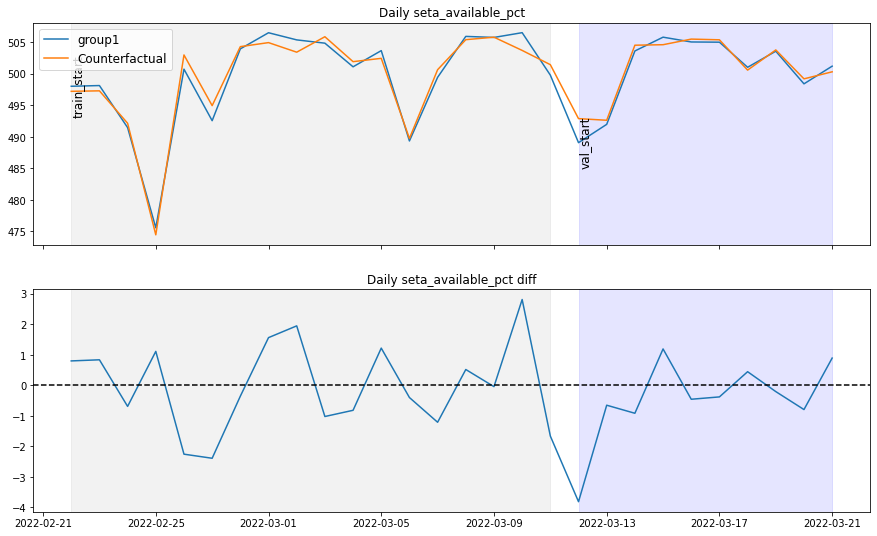

[delivery_late_percent] group0 vs. Counterfactual
const                    8.645997
delivery_late_percent    0.857657
dtype: float64


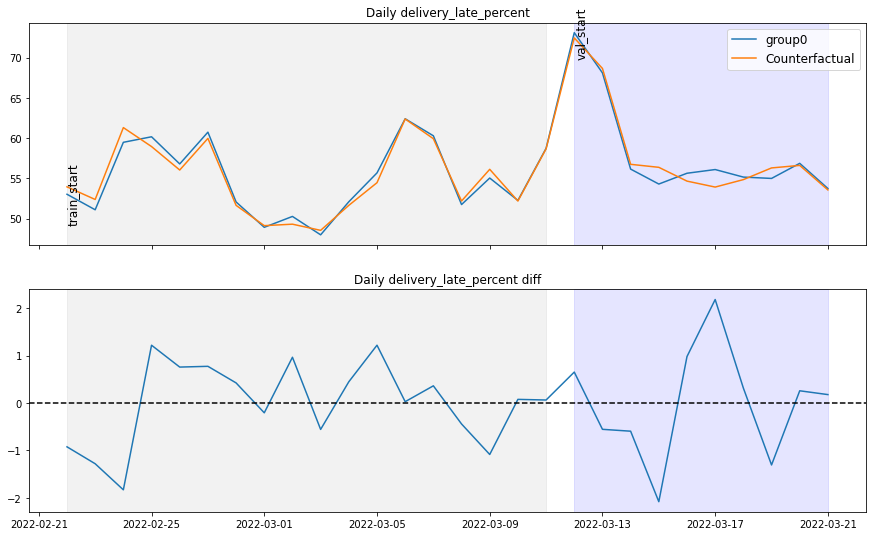

[total_labor_cost_dollars] group0 vs. Counterfactual
const                       457.30199
total_labor_cost_dollars      0.89543
dtype: float64


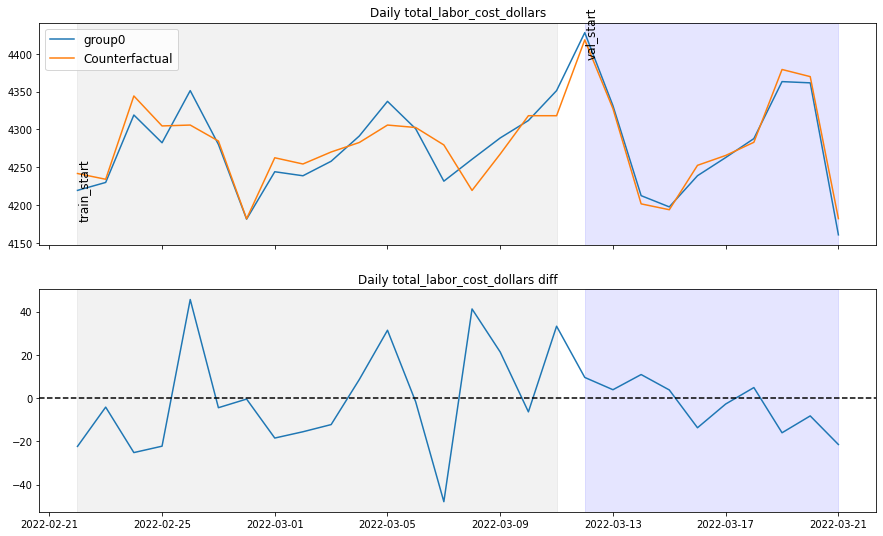

---------------------------------
Running candidate_1 ...
[seta_available_pct] group0 vs. Counterfactual
const                 66.120766
seta_available_pct     0.870447
dtype: float64


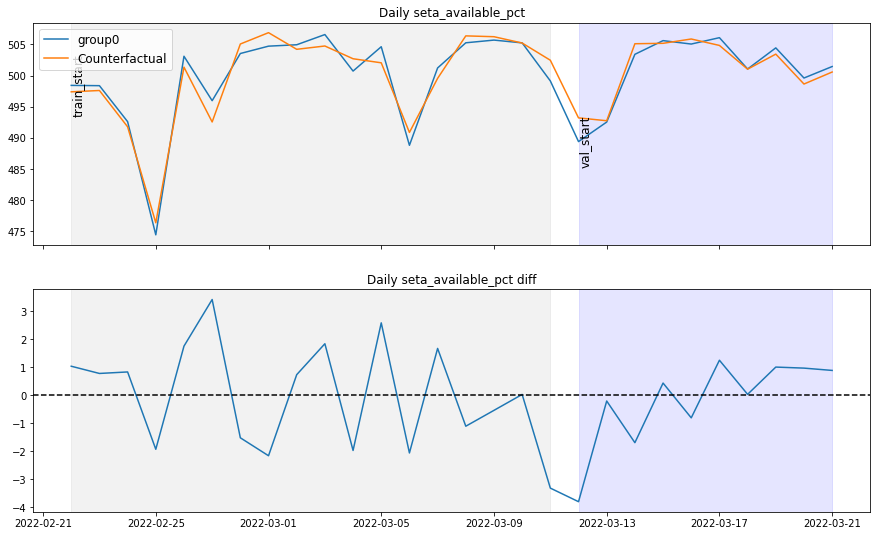

[delivery_late_percent] group1 vs. Counterfactual
const                    5.460593
delivery_late_percent    0.925302
dtype: float64


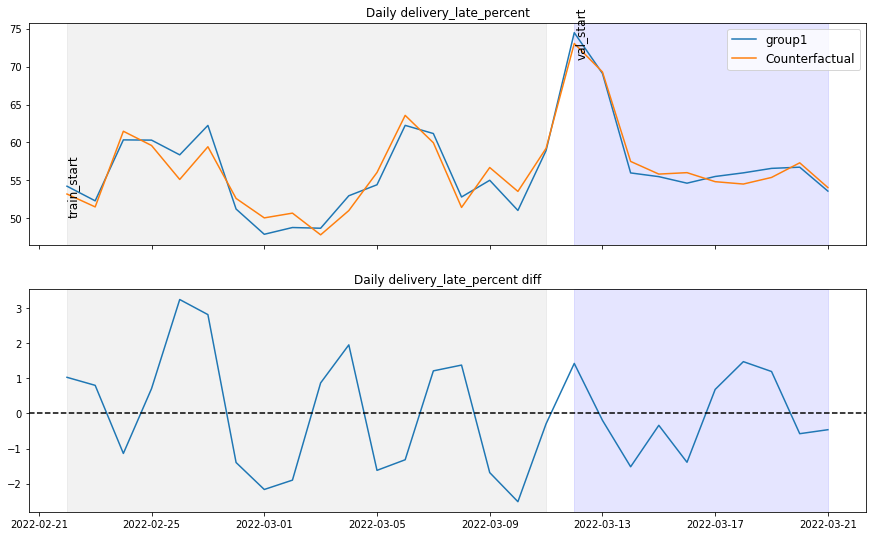

[total_labor_cost_dollars] group1 vs. Counterfactual
const                       881.471203
total_labor_cost_dollars      0.797458
dtype: float64


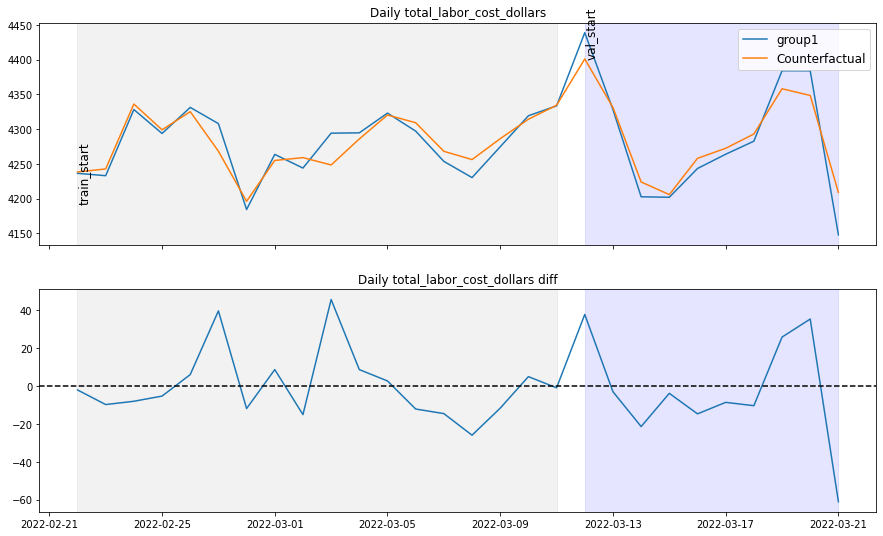

---------------------------------
Running candidate_2 ...
[seta_available_pct] group1 vs. Counterfactual
const                 107.952484
seta_available_pct      0.784356
dtype: float64


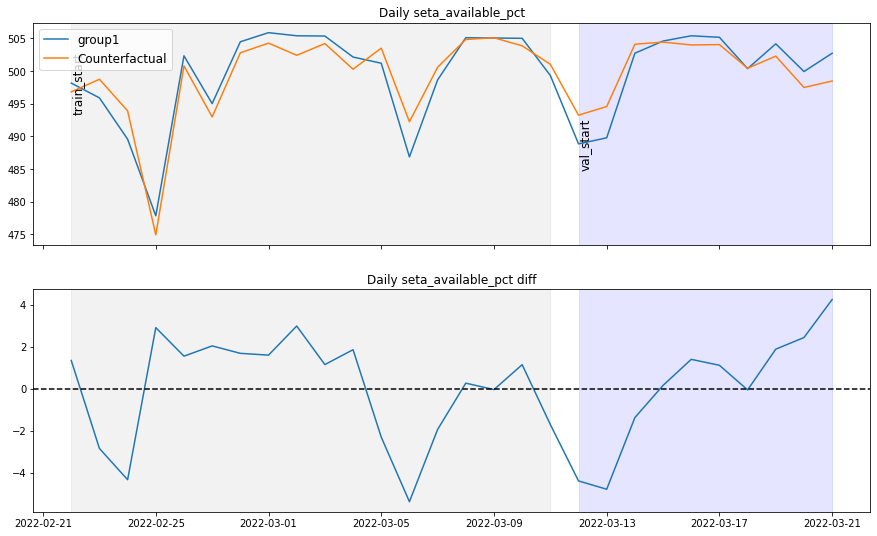

[delivery_late_percent] group1 vs. Counterfactual
const                    6.071684
delivery_late_percent    0.922228
dtype: float64


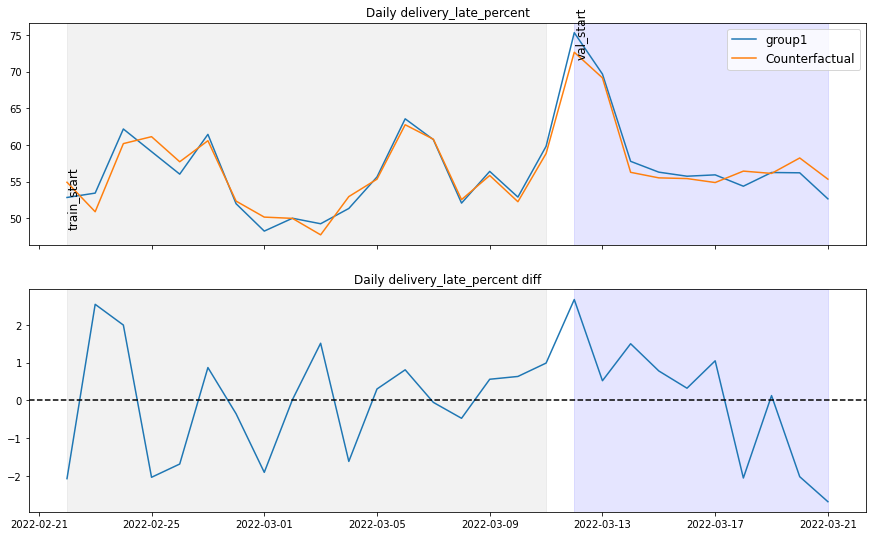

[total_labor_cost_dollars] group0 vs. Counterfactual
const                      -44.304449
total_labor_cost_dollars     1.025767
dtype: float64


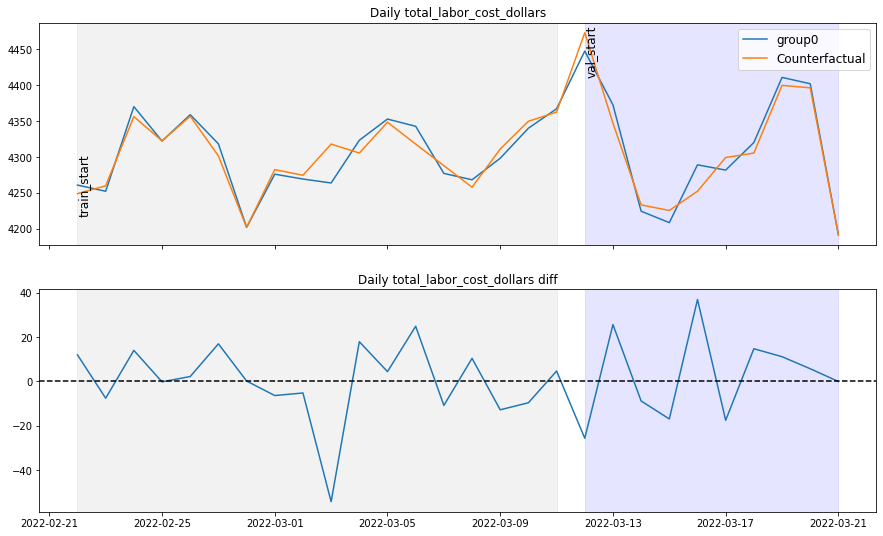

---------------------------------
Running candidate_3 ...
[seta_available_pct] group0 vs. Counterfactual
const                 107.256080
seta_available_pct      0.786746
dtype: float64


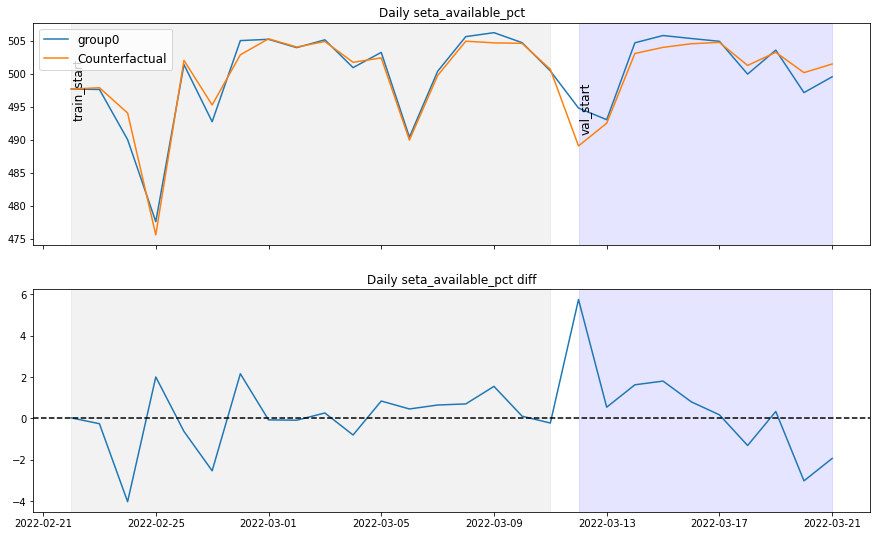

[delivery_late_percent] group0 vs. Counterfactual
const                    0.864097
delivery_late_percent    0.994290
dtype: float64


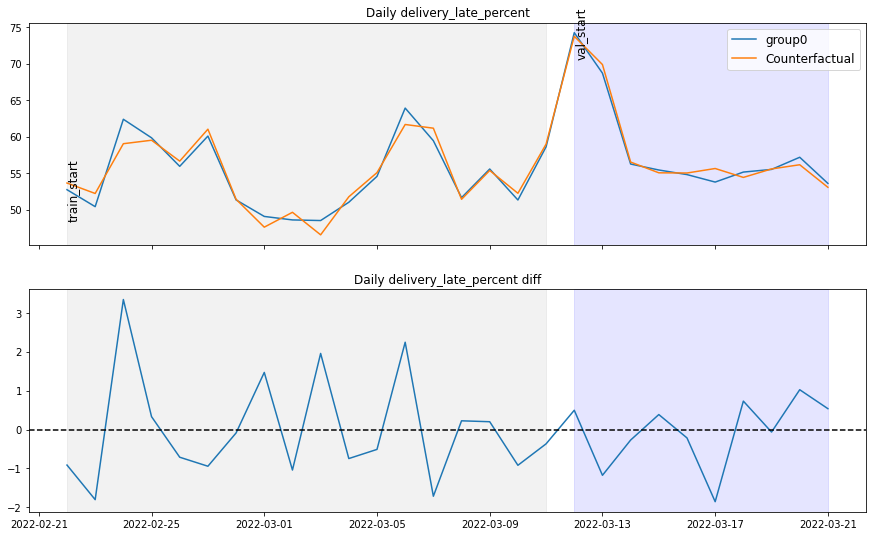

[total_labor_cost_dollars] group1 vs. Counterfactual
const                       679.273000
total_labor_cost_dollars      0.851967
dtype: float64


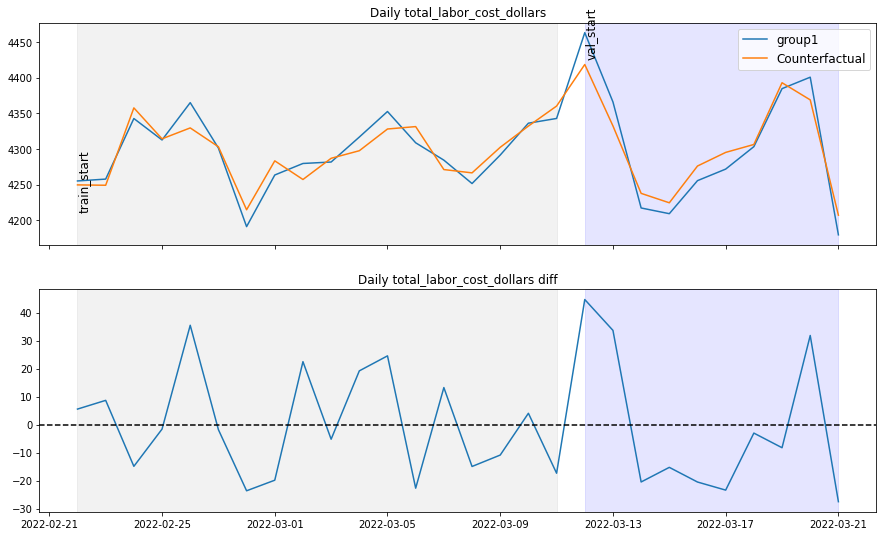

---------------------------------
Running candidate_4 ...
[seta_available_pct] group1 vs. Counterfactual
const                 109.637682
seta_available_pct      0.783320
dtype: float64


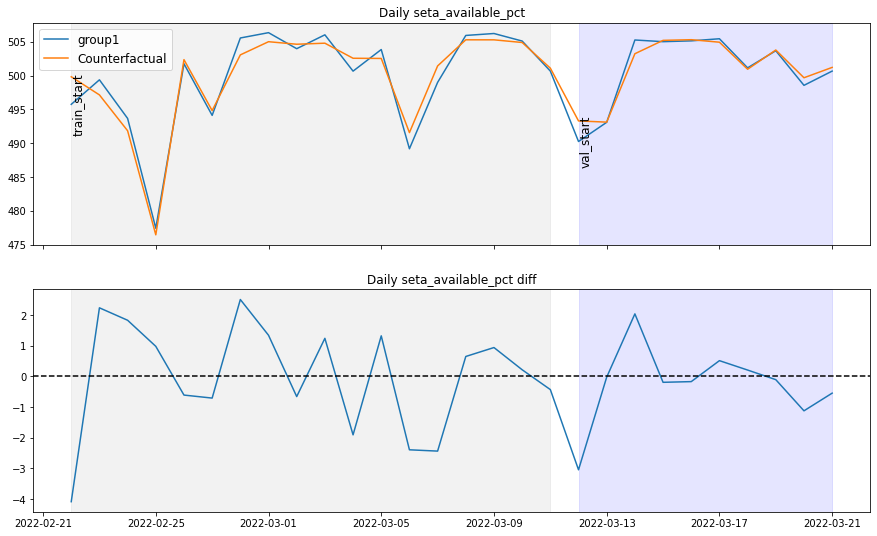

[delivery_late_percent] group0 vs. Counterfactual
const                    3.081183
delivery_late_percent    0.955880
dtype: float64


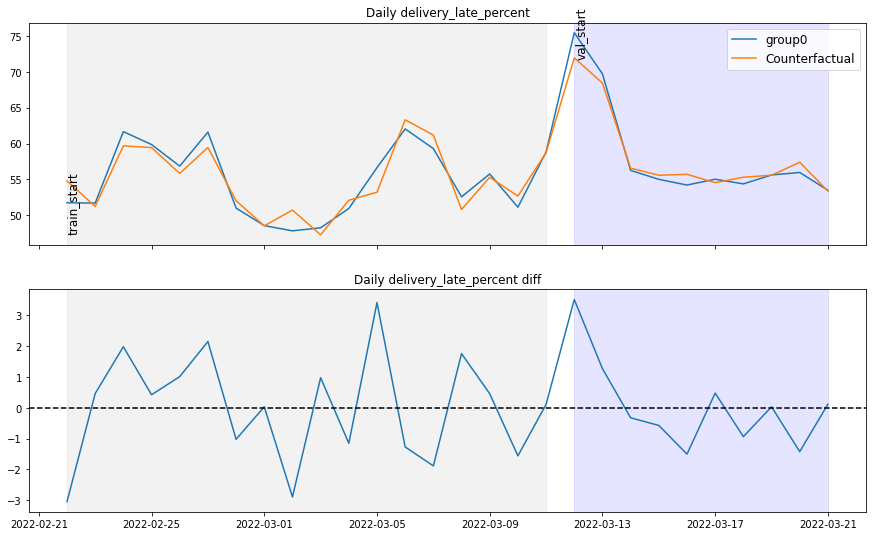

[total_labor_cost_dollars] group1 vs. Counterfactual
const                       1198.294762
total_labor_cost_dollars       0.737597
dtype: float64


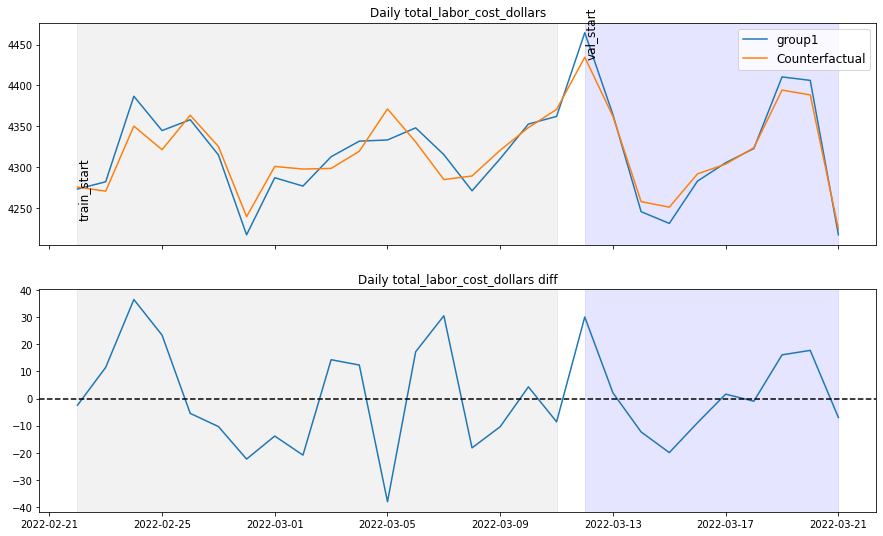

In [20]:
res = r.run(data)

In [25]:
for k, v in res.items():
    print(k + ':')
    for g, r in v.items():
        print(g + ':')
        print(r)
    print('\n')

candidate_0:
group0:
[270, 567, 1210, 542, 488, 697, 1507, 1350, 593, 1341, 558, 127, 920, 1367, 742, 604, 76, 1, 517, 1865, 524, 566, 581, 308, 353, 594, 1092, 1496, 379, 1222, 1851, 770, 1267, 304, 1431, 1145, 653, 1544, 1049, 1508, 553, 1157, 253, 1309, 693, 1781, 922, 560, 1972, 564, 943, 607, 589, 1505, 423, 16, 748, 272, 1492, 1006, 1303, 1740, 1417, 1326, 383, 1099, 749, 1024, 27, 1172, 1771, 1653, 1627, 1549, 1654, 155, 668, 1455, 172, 1921, 523, 1323, 460, 242, 1166, 359, 212, 250, 971, 609, 674, 1229, 1583, 1151, 1217, 518, 506, 160, 1048, 1098, 1143, 337, 1688, 1108, 1410, 759, 1421, 283, 1433, 757, 251, 373, 765, 1435, 704, 1916, 1474, 1854, 14, 1523, 340, 1148, 790, 921, 767, 1103, 1041, 168, 1140, 1365, 1076, 1318, 1139, 1340, 695, 792, 1002, 50, 386, 282, 1632, 1072, 1206, 363, 1547, 425, 326, 727, 1515, 507, 522, 744, 248, 720, 295, 285, 953, 2026, 1502, 146, 374, 456, 1428, 780, 1137, 190, 1695, 973, 378, 101, 992, 1331, 214, 167, 325, 598, 1129, 1294, 1288, 37, 239, 5